<a href="https://colab.research.google.com/github/Yash-singh25/test_project/blob/master/Digit_Recognizer_(kaggle)_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
!pip install tensorflow==2.0.0

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.ensemble import *
import tensorflow as tf

In [61]:
dataset_train = pd.read_csv('/content/train.csv.zip')
dataset_test = pd.read_csv('/content/test.csv (3).zip')

In [62]:
dataset_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [63]:
dataset_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [64]:
print(dataset_train.shape)
print(dataset_test.shape)

(42000, 785)
(28000, 784)


In [79]:
dataset_train2 = dataset_train.copy()
dataset_test2 = dataset_test.copy()

In [80]:
y_train = dataset_train2.pop('label')


In [91]:
y_train0 = y_train.astype('uint8')
y_train0 = np.asarray(y_train0)

In [92]:
print(y_train0.shape)
print(y_train0.dtype)

(42000,)
uint8


In [84]:
dataset_train2 = np.asarray(dataset_train2).reshape(42000,28,28)
dataset_test2 = np.asarray(dataset_test2).reshape(28000,28,28)
print(dataset_train2.shape)
print(dataset_test2.shape)

(42000, 28, 28)
(28000, 28, 28)


In [94]:
dataset_train2 = dataset_train2/255.0
dataset_test2 = dataset_test2/255.0

In [95]:
column = ['0','1','2','3','4','5','6','7','8','9']

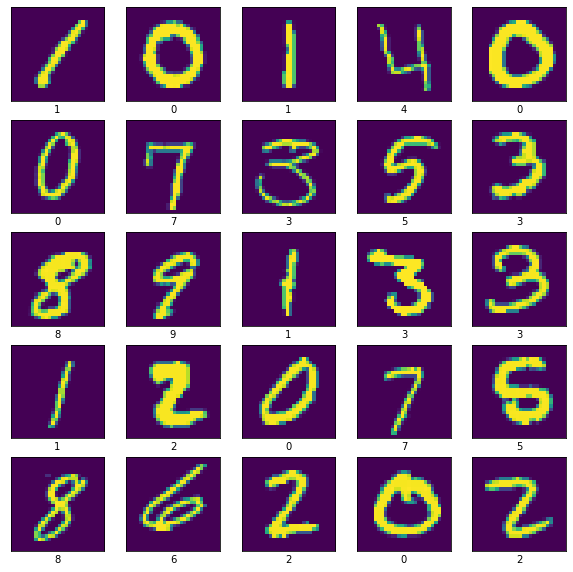

In [137]:
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(dataset_train2[i])
  plt.xlabel(column[y_train0[i]])
  plt.xticks([])
  plt.yticks([])
plt.show()

In [96]:
dataset_train2.shape

(42000, 28, 28)

In [108]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model.add(tf.keras.layers.Dense(64 , activation='relu'))
model.add(tf.keras.layers.Dense(64 , activation='relu'))
model.add(tf.keras.layers.Dense(10 , activation='softmax'))

In [109]:
model.compile(optimizer='adam' , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])


In [110]:
model.fit(dataset_train2 , y_train0 , epochs= 10)

Train on 42000 samples
Epoch 1/10
42000/42000 [==============================] - 5s 110us/sample - loss: 1.6619 - accuracy: 0.8118
Epoch 2/10
42000/42000 [==============================] - 4s 99us/sample - loss: 1.5851 - accuracy: 0.8795
Epoch 3/10
42000/42000 [==============================] - 4s 98us/sample - loss: 1.5151 - accuracy: 0.9492
Epoch 4/10
42000/42000 [==============================] - 4s 97us/sample - loss: 1.5041 - accuracy: 0.9594
Epoch 5/10
42000/42000 [==============================] - 4s 99us/sample - loss: 1.4977 - accuracy: 0.9655
Epoch 6/10
42000/42000 [==============================] - 5s 110us/sample - loss: 1.4931 - accuracy: 0.9699
Epoch 7/10
42000/42000 [==============================] - 5s 112us/sample - loss: 1.4903 - accuracy: 0.9722
Epoch 8/10
42000/42000 [==============================] - 5s 107us/sample - loss: 1.4875 - accuracy: 0.9746
Epoch 9/10
42000/42000 [==============================] - 4s 98us/sample - loss: 1.4862 - accuracy: 0.9761
Epoch 10/1

In [112]:
prediction_model = tf.keras.Sequential([model , tf.keras.layers.Softmax()])

In [116]:
prediction_train = prediction_model.predict(dataset_train2)

In [117]:
prediction_test = prediction_model.predict(dataset_test2)

In [125]:
prediction_train[1]

array([0.23196931, 0.08533674, 0.08533674, 0.08533674, 0.08533674,
       0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.08533674],
      dtype=float32)

In [132]:
print(y_train0.shape)
print(predicted_label.shape)

(42000,)
(42000,)


In [126]:
predicted_label = []
for i in range(42000):
  predicted_label.append(np.argmax(prediction_train[i]))

In [129]:
predicted_label = np.array(predicted_label)

In [128]:
y_train0

array([1, 0, 1, ..., 7, 6, 9], dtype=uint8)

In [133]:
r2_score(y_train0 , predicted_label)

0.946038170788067

In [134]:
predicted_label_test = []
for i in range(28000):
  predicted_label_test.append(np.argmax(prediction_test[i]))

In [135]:
predicted_label_test = np.array(predicted_label_test)

In [136]:
predicted_label_test.shape

(28000,)

In [140]:
output = pd.DataFrame({'ImageId':range(1,28001) , 'Label' : predicted_label_test})

In [143]:
output.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
